In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# Define paths for the preprocessed dataset
processed_train_dir = '/content/drive/MyDrive/sports/sports_processed/train'
processed_test_dir = '/content/drive/MyDrive/sports/sports_processed/test'

# Image parameters
image_size = (240, 240)  # Preprocessed size
batch_size = 32
num_classes = 12  # Total number of sports categories

# Load the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    processed_train_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'  # Labels will be one-hot encoded
)

# Load the test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    processed_test_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'  # Labels will be one-hot encoded
)


Found 4200 files belonging to 12 classes.
Found 1800 files belonging to 12 classes.


In [ ]:
# Load the Xception model without the top layer (fully connected layers)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Make all layers trainable
base_model.trainable = True

# Build the custom model
model_xception = Sequential([
    base_model,  # Xception base model
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # First dense layer with 1024 units
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),  # Second dense layer with 512 units
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
optimizer = Adam(learning_rate=0.00001)  # Use a smaller learning rate to avoid destabilizing training
model_xception.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_xception.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 8, 8, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,048,052 (84.11 MB)

 Trainable params: 21,991,988 (83.89 MB)

 Non-trainable params: 56,064 (219.00 KB)

In [ ]:
# Train the Xception-based model
history_xception = model_xception.fit(
    train_dataset,
    epochs=40,
    validation_data=test_dataset
)


Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 2612s 19s/step - accuracy: 0.0929 - loss: 3.7617 - val_accuracy: 0.1061 - val_loss: 2.5944
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 82s 621ms/step - accuracy: 0.1850 - loss: 2.9891 - val_accuracy: 0.2261 - val_loss: 2.2234
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 82s 618ms/step - accuracy: 0.2797 - loss: 2.5294 - val_accuracy: 0.4661 - val_loss: 1.6691
Epoch 4/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 80s 603ms/step - accuracy: 0.3769 - loss: 2.1265 - val_accuracy: 0.5833 - val_loss: 1.3281
Epoch 5/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 79s 600ms/step - accuracy: 0.4373 - loss: 1.8147 - val_accuracy: 0.6350 - val_loss: 1.1508
Epoch 6/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 84s 614ms/step - accuracy: 0.5256 - loss: 1.5082 - val_accuracy: 0.6711 - val_loss: 1.0296
Epoch 7/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 79s 600ms/step - accuracy: 0.5819 - loss: 1.3585 - val_accuracy: 0.7067 - val_loss: 0.9398
Epoch 8/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 82s 601ms/step - accuracy: 0.6266 - loss: 1

In [ ]:
# Evaluate the model on the test data
test_loss_xception, test_accuracy_xception = model_xception.evaluate(test_dataset)
print(f"Test Loss: {test_loss_xception}")
print(f"Test Accuracy: {test_accuracy_xception}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.8714 - loss: 0.4709
Test Loss: 0.4586403965950012
Test Accuracy: 0.8700000047683716


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

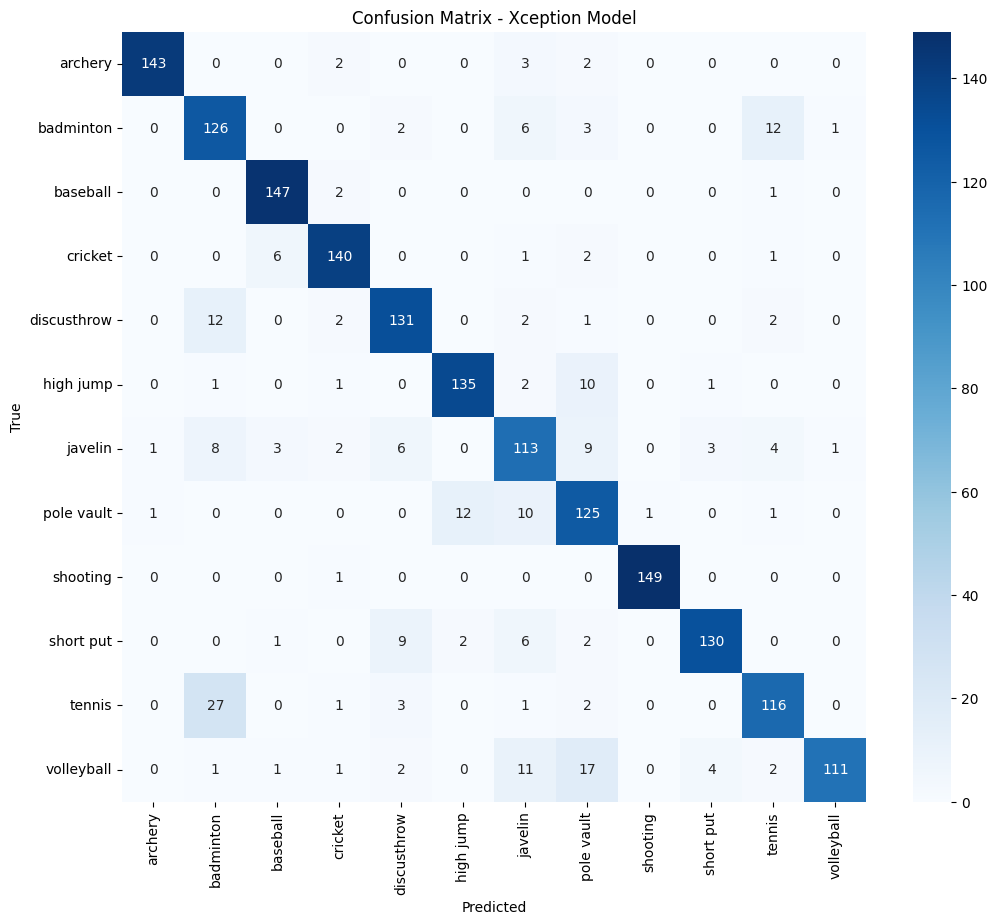

Classification Report - Xception:
              precision    recall  f1-score   support

     archery       0.99      0.95      0.97       150
   badminton       0.72      0.84      0.78       150
    baseball       0.93      0.98      0.95       150
     cricket       0.92      0.93      0.93       150
 discusthrow       0.86      0.87      0.86       150
   high jump       0.91      0.90      0.90       150
     javelin       0.73      0.75      0.74       150
  pole vault       0.72      0.83      0.77       150
    shooting       0.99      0.99      0.99       150
   short put       0.94      0.87      0.90       150
      tennis       0.83      0.77      0.80       150
  volleyball       0.98      0.74      0.84       150

    accuracy                           0.87      1800
   macro avg       0.88      0.87      0.87      1800
weighted avg       0.88      0.87      0.87      1800



In [ ]:
# Get predictions and true labels
y_true_xception = []
y_pred_xception = []

for images, labels in test_dataset:
    preds = model_xception.predict(images)
    y_true_xception.extend(tf.argmax(labels, axis=1).numpy())
    y_pred_xception.extend(tf.argmax(preds, axis=1).numpy())

# Confusion Matrix
class_names = ['archery', 'badminton', 'baseball', 'cricket', 'discusthrow',
               'high jump', 'javelin', 'pole vault', 'shooting',
               'short put', 'tennis', 'volleyball']

conf_matrix_xception = confusion_matrix(y_true_xception, y_pred_xception)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_xception, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Xception Model')
plt.show()

# Classification Report
print("Classification Report - Xception:")
print(classification_report(y_true_xception, y_pred_xception, target_names=class_names))


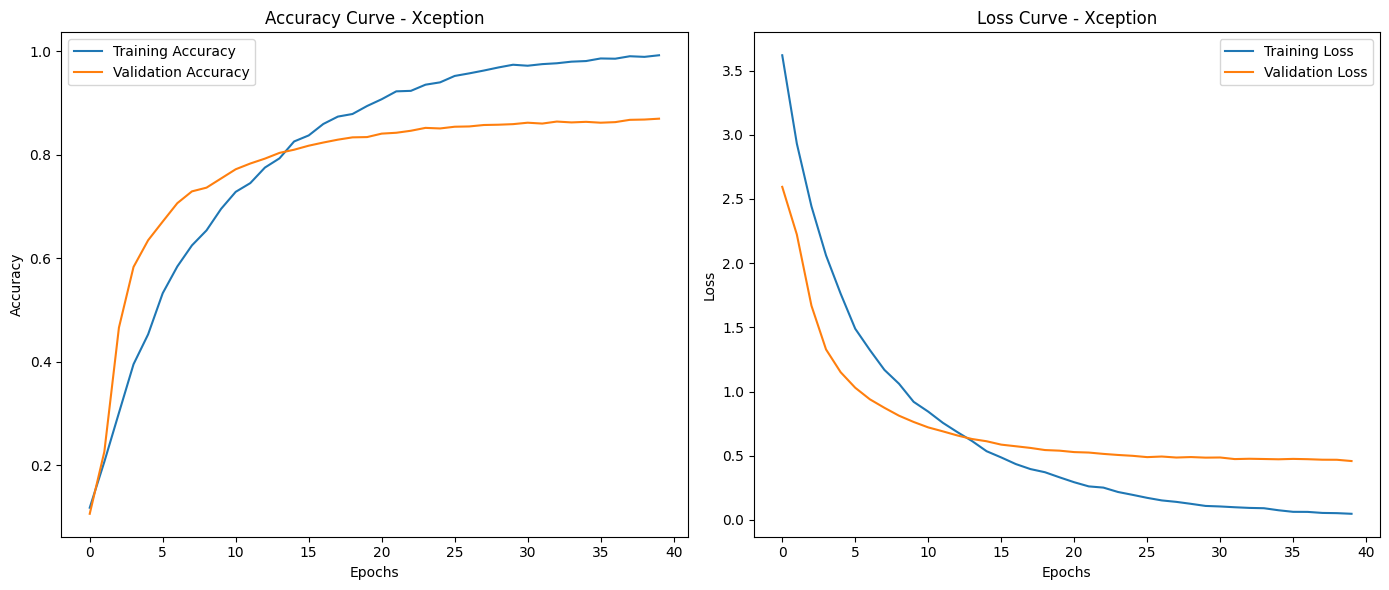

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_xception.history['accuracy'], label='Training Accuracy')
plt.plot(history_xception.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve - Xception')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_xception.history['loss'], label='Training Loss')
plt.plot(history_xception.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - Xception')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy for archery: 0.95
Accuracy for badminton: 0.84
Accuracy for baseball: 0.98
Accuracy for cricket: 0.93
Accuracy for discusthrow: 0.87
Accuracy for high jump: 0.90
Accuracy for javelin: 0.75
Accuracy for pole vault: 0.83
Accuracy for shooting: 0.99
Accuracy for short put: 0.87
Accuracy for tennis: 0.77
Accuracy for volleyball: 0.74


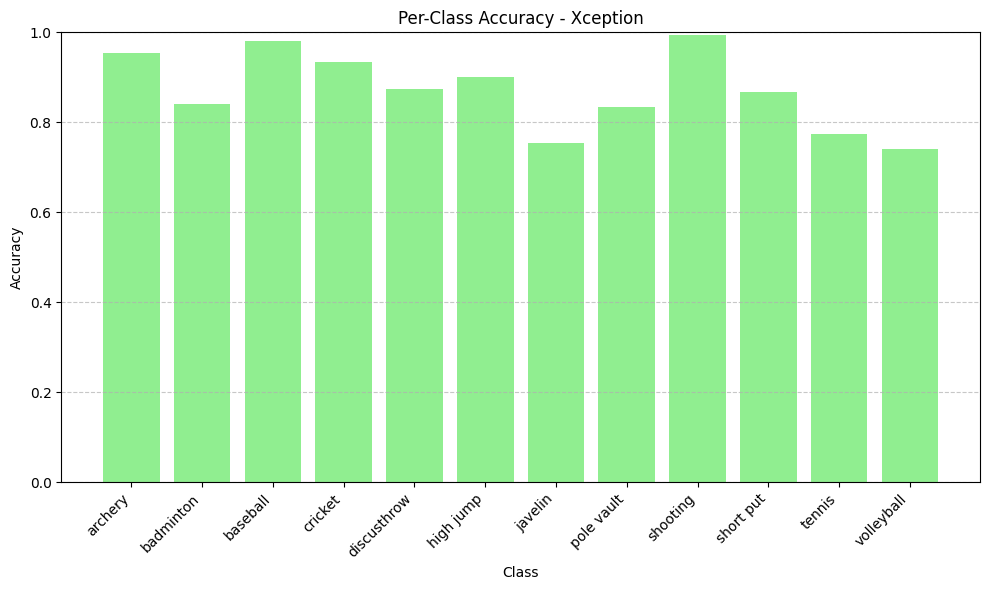

In [ ]:
# Calculate and display per-class accuracy
class_accuracies = conf_matrix_xception.diagonal() / conf_matrix_xception.sum(axis=1)
for idx, class_name in enumerate(class_names):
    print(f"Accuracy for {class_name}: {class_accuracies[idx]:.2f}")

# Optionally visualize per-class accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy - Xception')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
